In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [540]:
# Import the relevant packages for this project.
# Follow this with importing and checking the relevant data.

In [541]:
euro_stoxx_data = pd.read_csv(('eursotoxx.csv'),parse_dates=['Date'], index_col='Date')

In [542]:
print(euro_stoxx_data.head())

            SX5E Close Price
Date                        
2022-08-31           3517.25
2022-07-29           3708.10
2022-06-30           3454.86
2022-05-31           3789.21
2022-04-29           3802.86


In [543]:
iboxx_data = pd.read_csv(('iboxx_data.csv'),parse_dates=['Date'], index_col='Date')

In [544]:
print(iboxx_data.head())

            IBOXX Close Price data  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
Date                                                                     
2022-08-31                212.1833         NaN         NaN         NaN   
2022-07-29                221.5675         NaN         NaN         NaN   
2022-06-30                211.5370         NaN         NaN         NaN   
2022-05-31                219.3781         NaN         NaN         NaN   
2022-04-29                222.2147         NaN         NaN         NaN   

            Unnamed: 5  
Date                    
2022-08-31         NaN  
2022-07-29         NaN  
2022-06-30         NaN  
2022-05-31         NaN  
2022-04-29         NaN  


In [545]:
iboxx_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'],axis=1)

,IBOXX Close Price data
Date,
2022-08-31,212.1833
2022-07-29,221.5675
2022-06-30,211.5370
2022-05-31,219.3781
2022-04-29,222.2147
2022-03-31,228.5922
2022-02-28,231.7130
2022-01-31,238.2356
2021-12-31,241.5313


In [546]:
euro_stoxx_returns = euro_stoxx_data['SX5E Close Price'].pct_change()

In [547]:
print(euro_stoxx_returns.head())

df = euro_stoxx_returns
df.isnull().values.sum()

Date
2022-08-31         NaN
2022-07-29    0.054261
2022-06-30   -0.068294
2022-05-31    0.096777
2022-04-29    0.003602
Name: SX5E Close Price, dtype: float64


1

In [548]:
iboxx_returns = iboxx_data['IBOXX Close Price data'].pct_change()

In [549]:
print(iboxx_returns.head())
df2 = iboxx_returns
df2.isnull().values.sum()


Date
2022-08-31         NaN
2022-07-29    0.044227
2022-06-30   -0.045271
2022-05-31    0.037067
2022-04-29    0.012930
Name: IBOXX Close Price data, dtype: float64


1

In [550]:
# After getting the data in for the 2 asset classes and calculitng the returns,check the data before concatinating the 2 data frames.

In [551]:
dates = pd.date_range("2019-09-30","2022-07-29",freq="1M")
df1 =euro_stoxx_returns
df2=iboxx_returns
Portfolios = pd.concat([df1,df2],axis=1)

print(Portfolios.head())

            SX5E Close Price  IBOXX Close Price data
Date                                                
2022-08-31               NaN                     NaN
2022-07-29          0.054261                0.044227
2022-06-30         -0.068294               -0.045271
2022-05-31          0.096777                0.037067
2022-04-29          0.003602                0.012930


In [552]:
Portfolios.columns=["EuroStoxx","IBoxx"]
print(Portfolios.head())

            EuroStoxx     IBoxx
Date                           
2022-08-31        NaN       NaN
2022-07-29   0.054261  0.044227
2022-06-30  -0.068294 -0.045271
2022-05-31   0.096777  0.037067
2022-04-29   0.003602  0.012930


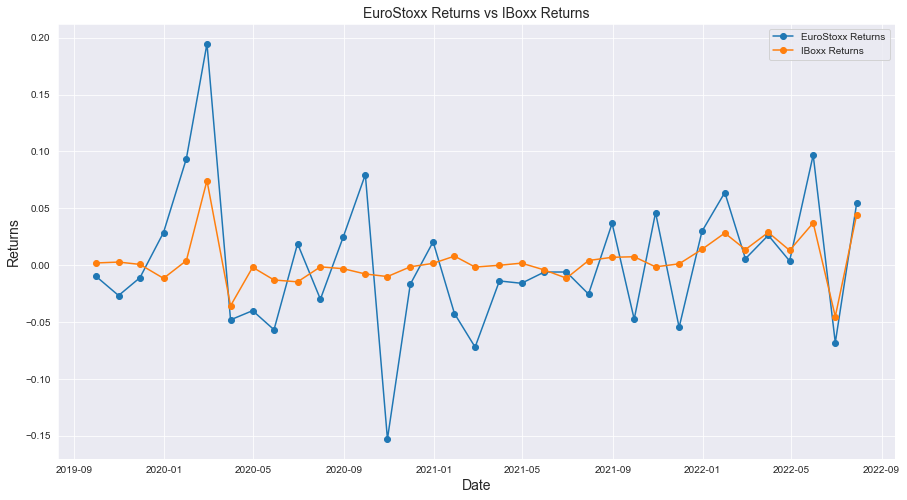

In [553]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(Portfolios, marker='o')
plt.title('EuroStoxx Returns vs IBoxx Returns', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.legend(['EuroStoxx Returns','IBoxx Returns'])
plt.grid(True)
plt.show()

In [554]:
# Making a chart of the 2 assets returns allows us to look at how the move about form month to month.
# From this its porrislbe to see how there are periods of volatiltiy when returns move by a large amount from 1 month to the next.

In [555]:
corrMatrix = Portfolios.corr()
print (corrMatrix)

           EuroStoxx     IBoxx
EuroStoxx   1.000000  0.665128
IBoxx       0.665128  1.000000


In [556]:
# The chart above leads to look at the correlations between the 2 asset clases, finding they are correlated, but not by much, so could offer diversification benefits in a portfolio.

In [557]:
Portfolios_mean_return = Portfolios.mean(axis=0)
print(Portfolios_mean_returns.head())

EuroStoxx    0.468986
IBoxx        0.583612
dtype: float64


In [558]:
Portfolios_std_dev = Portfolios.std()
print(Portfolios_std_devs.head())

          0
0  0.279085
1  0.282722


In [559]:
Portfolios_mean_retruns = pd.DataFrame([0.468986,0.583612])
weights=pd.DataFrame([[1,0],[0.9,0.1],[0.8,0.2],[0.7,0.3],[0.6,0.4],[0.5,0.5],[0.4,0.6],[0.3,0.7],[0.2,0.8],[0.1,0.9],[0,1]])
final= weights.dot(Portfolios_mean_retruns)
final.columns=['Portfolio mean retrun'] 
print(final)


    Portfolio mean retrun
0                0.468986
1                0.480449
2                0.491911
3                0.503374
4                0.514836
5                0.526299
6                0.537762
7                0.549224
8                0.560687
9                0.572149
10               0.583612


In [560]:
# Performing the mean and standard deviations will allow to calculate the Sharpe ratios for the portfolios later.
# Making charts of each of these allows for a visual representation of the data on the portfolios. 

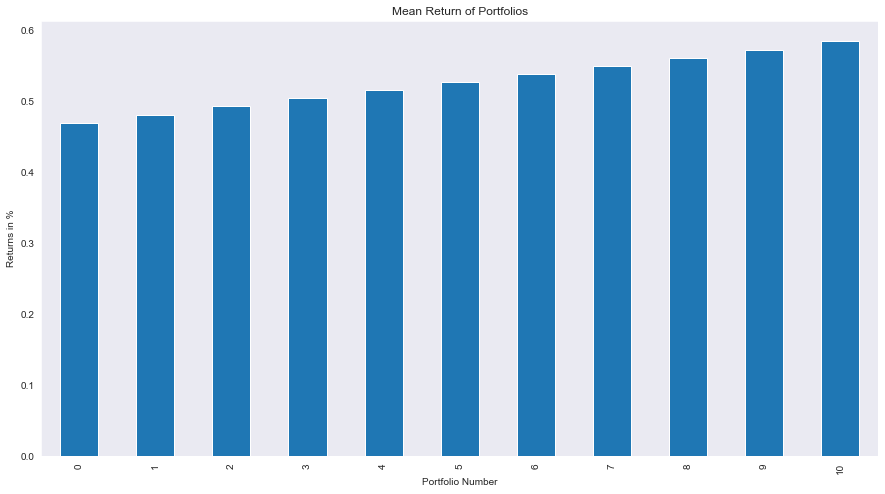

In [561]:
final.plot(kind="bar",legend=False)
plt.title("Mean Return of Portfolios")
plt.xlabel("Portfolio Number")
plt.ylabel("Returns in %")
plt.show()

In [562]:
Portfolios_std_devs = pd.DataFrame([0.279085,0.282722])
weights=pd.DataFrame([[1,0,],[0.9,0.1],[0.8,0.2],[0.7,0.3],[0.6,0.4],[0.5,0.5],[0.4,0.6],[0.3,0.7],[0.2,0.8],[0.1,0.9],[0,1]])
final2=weights.dot(Portfolios_std_devs)
final2.columns=["Portfolio Standard Deviations"]
print(final2)

    Portfolio Standard Deviations
0                        0.279085
1                        0.279449
2                        0.279812
3                        0.280176
4                        0.280540
5                        0.280903
6                        0.281267
7                        0.281631
8                        0.281995
9                        0.282358
10                       0.282722


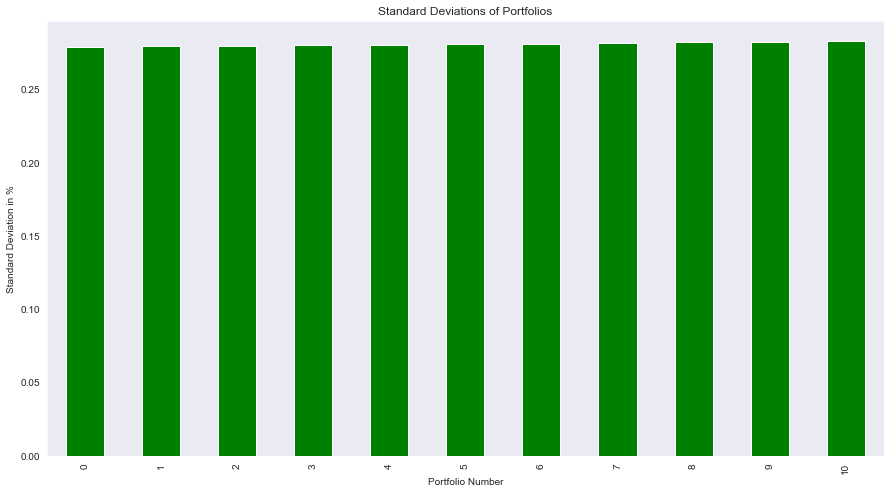

In [563]:
sns.set_style("dark")
final2.plot(kind='bar',color='green', legend=False)
plt.title("Standard Deviations of Portfolios")
plt.xlabel("Portfolio Number")
plt.ylabel("Standard Deviation in %")
plt.show()

In [564]:
Bubill_3m_data = pd.read_csv(('bubill3mbond.csv'),parse_dates=['Date'], index_col='Date')
print(Bubill_3m_data.head())

            BUBILL Close Rate
Date                         
2022-08-31              0.032
2022-07-29             -0.060
2022-06-30             -0.499
2022-05-31             -0.639
2022-04-29             -0.721


In [565]:
# Import the risk free rate, here using 3month German government bond.
# Taking the mean for the sample period allows to use this with the portfolios. 
# After this take the risk free rate away from the portfolio returns to get the excess returns dataframe.

In [566]:
Risk_free_rate = Bubill_3m_data.mean()
print(Risk_free_rate)

BUBILL Close Rate   -0.639278
dtype: float64


In [567]:
Excess_returns = final.subtract(Risk_free_rate.loc['BUBILL Close Rate'])
Excess_returns.columns=['Excess Returns']
print(Excess_returns)

    Excess Returns
0         1.108264
1         1.119726
2         1.131189
3         1.142652
4         1.154114
5         1.165577
6         1.177039
7         1.188502
8         1.199965
9         1.211427
10        1.222890


In [568]:
# Below there was a problem with getting the excess returns dataframe to divide by the portfolios standard deviation df (final2).
# Tried the conventional method that did not work, so had to do some research and found the solution below.

#Sharpe_Ratios = Excess_returns.div(final2)
#print(Sharpe_Ratios)

In [569]:
Sharpe_Ratios = Excess_returns['Excess Returns'] / final2['Portfolio Standard Deviations']
print(Sharpe_Ratios)

0     3.971062
1     4.006912
2     4.042669
3     4.078334
4     4.113905
5     4.149385
6     4.184773
7     4.220070
8     4.255275
9     4.290390
10    4.325414
dtype: float64


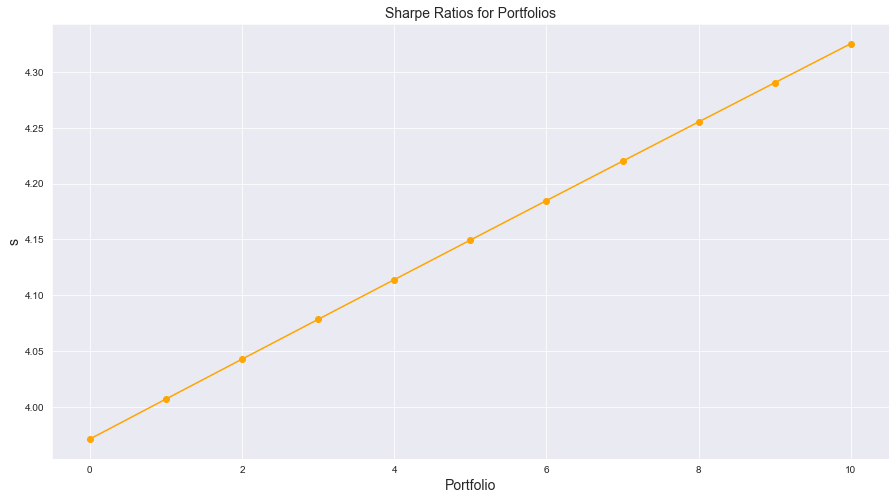

In [570]:
plt.plot(Sharpe_Ratios,color='orange', marker='o')
plt.title('Sharpe Ratios for Portfolios', fontsize=14)
plt.xlabel('Portfolio', fontsize=14)
plt.ylabel('s', fontsize=14)
plt.grid(True)
plt.show()